In [4]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [118]:
# Lecture du dataframe
df = pd.read_csv(r'./news_dataset.csv')

In [5]:
# Visualisation des 5 premières lignes du dataframe
df.head(5)

category                                               text
0           tech  tv future in the hands of viewers with home th...
1       business  worldcom boss  left books alone  former worldc...
2          sport  tigers wary of farrell  gamble  leicester say ...
3          sport  yeading face newcastle in fa cup premiership s...
4  entertainment  ocean s twelve raids box office ocean s twelve...

In [6]:
# Les différentes catégories
df['category'].unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [7]:
df.shape

(2225, 2)

In [8]:
df.describe()

category                                               text
count      2225                                               2225
unique        5                                               2126
top       sport  kennedy questions trust of blair lib dem leade...
freq        511                                                  2

In [298]:
df[df['category']=='entertainment']

category                                               text  \
4     entertainment  ocean s twelve raids box office ocean s twelve...   
9     entertainment  last star wars  not for children  the sixth an...   
10    entertainment  berlin cheers for anti-nazi film a german movi...   
26    entertainment  career honour for actor dicaprio actor leonard...   
29    entertainment  halloween writer debra hill dies screenwriter ...   
...             ...                                                ...   
2205  entertainment  dance music not dead says fatboy dj norman coo...   
2208  entertainment  snicket tops us box office chart the film adap...   
2211  entertainment  lopez misses uk charity premiere jennifer lope...   
2216  entertainment  top stars join us tsunami tv show brad pitt  r...   
2222  entertainment  rem announce new glasgow concert us band rem h...   

                                           cleaned_news  
4     ocean twelve raids box office ocean twelve cri...  
9     last star wars children sixth final star wars ...  
10    berlin cheers antinazi film german movie antin...  
26    career honour actor dicaprio actor leonardo di...  
29    halloween writer debra hill dies screenwriter ...  
...                                                 ...  
2205  dance music dead says fatboy dj norman cook ak...  
2208  snicket tops us box office chart film adaptati...  
2211  lopez misses uk charity premiere jennifer lope...  
2216  top stars join us tsunami tv show brad pitt ro...  
2222  rem announce new glasgow concert us band rem a...  

[386 rows x 3 columns]

# Data exploration
* word cloud (après preprocessing)
* boxplot.. : longueur du texte par topic
* barchart : nombre de caractères spéciaux par topic
* piechart : 5 piecharts (1 par topic) : nombre d'apparitions de chaque caractère spécial
* scatter ? heatmap (après preprocessing) ?

In [6]:
from wordcloud import WordCloud

In [7]:
def add_dict_word(reviews):
    word_count = {}
    for review in reviews:
        for word in review.split(' ') :
            if word in word_count:
                word_count[word] += 1
            else :
                word_count[word] = 1
                
    return word_count
    
gdf = df.groupby('category').text.apply(list).reset_index()
gdf['word_count'] = gdf.text.apply(add_dict_word)
gdf

category                                               text  \
0       business  [worldcom boss  left books alone  former world...   
1  entertainment  [ocean s twelve raids box office ocean s twelv...   
2       politics  [howard hits back at mongrel jibe michael howa...   
3          sport  [tigers wary of farrell  gamble  leicester say...   
4           tech  [tv future in the hands of viewers with home t...   

                                          word_count  
0  {'worldcom': 60, 'boss': 33, '': 12269, 'left'...  
1  {'ocean': 14, 's': 1835, 'twelve': 9, 'raids':...  
2  {'howard': 310, 'hits': 4, 'back': 139, 'at': ...  
3  {'tigers': 14, 'wary': 3, 'of': 2800, 'farrell...  
4  {'tv': 241, 'future': 96, 'in': 3457, 'the': 1...

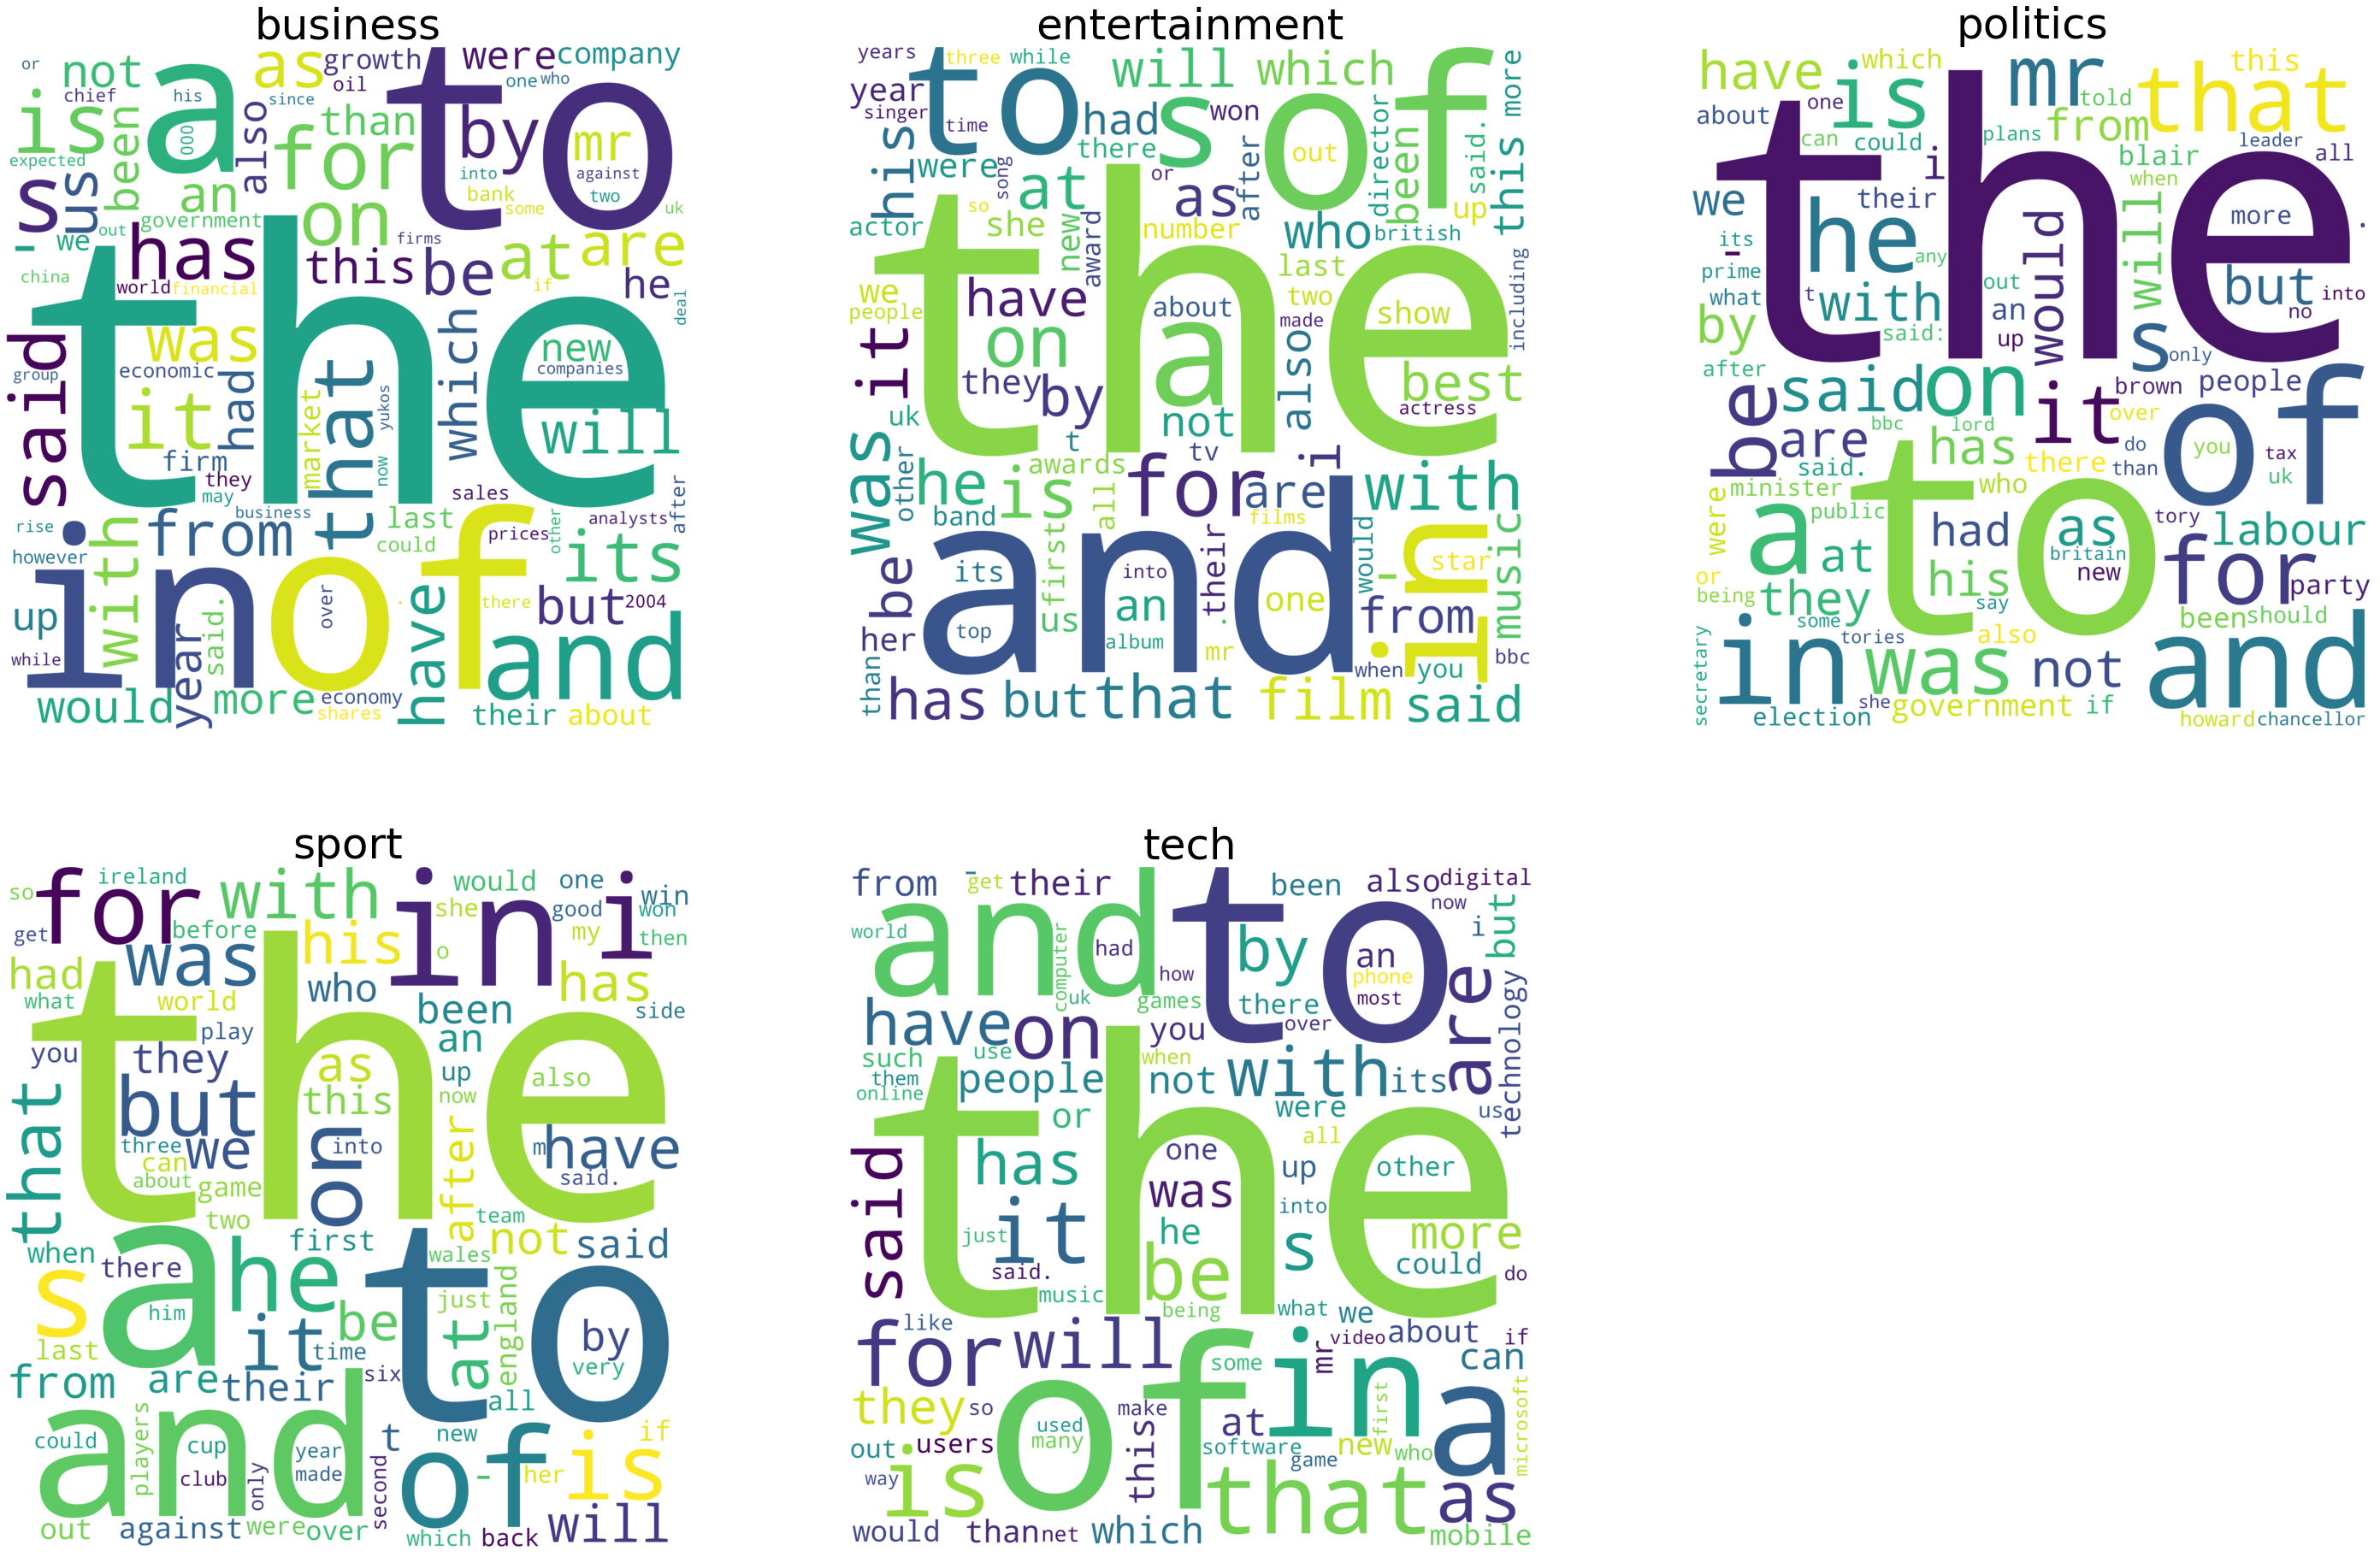

In [8]:
categories = gdf.category.values.tolist()
#fig, ax = plt.subplots(nrows=1, ncols=len(categories))
# list(gdf[gdf['category']=='entertainment'].word_count.to_dict().keys())[0]
plt.rcParams["figure.figsize"] = (50,50)
i=0
for cat in categories :
    data = gdf[gdf['category']==cat].word_count.to_dict()[i]
    wc = WordCloud(background_color ='white', width=5000, height = 5000, max_words = 100, relative_scaling = 0.5,normalize_plurals = False).generate_from_frequencies(data)
    plt.subplot(3,3,i+1)
    plt.axis("off")
    plt.imshow(wc, interpolation="bilinear")
    plt.title(cat,fontsize=50)
    i += 1
plt.show()

# A REFAIRE APRES LE PREPROCESSING !


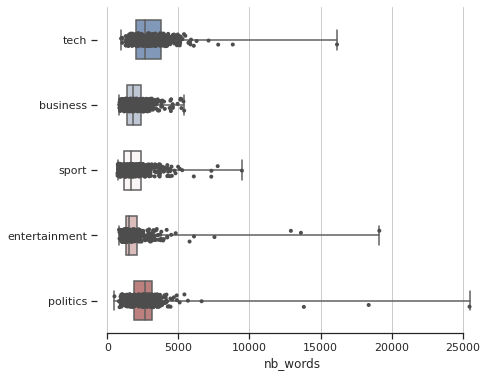

In [25]:
# boxplot


sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
#ax.set_xscale("log")


# x : nbr de mots par review
# y : category

# add column nb_words
df['nb_words'] = df['text'].apply(lambda x : len(x))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="nb_words", y="category", data=df,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="nb_words", y="category", data=df,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

[('tech', 36.920199501246884),
 ('business', 30.545098039215688),
 ('sport', 28.704500978473583),
 ('entertainment', 26.23316062176166),
 ('politics', 29.381294964028775)]

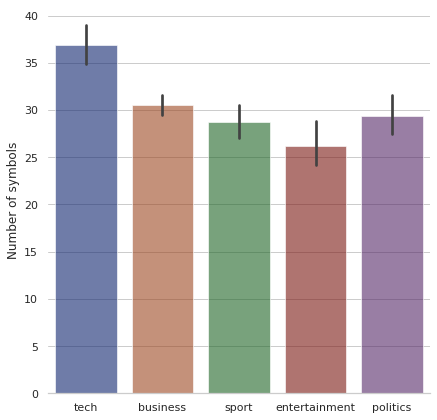

In [45]:
# barchart
symbols = set(r"""`~!@#$%^&*()_-+={[]}|\:;"'<,>.?/""")
df['nb_symbols'] = df['text'].apply(lambda x : len([i for i in x if i in symbols]))

sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df, kind="bar",
    x="category", y="nb_symbols", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Number of symbols")

# moyenne des symbols par catégorie
[(cat, df[df['category']==cat].nb_symbols.mean()) for cat in df['category'].unique()]

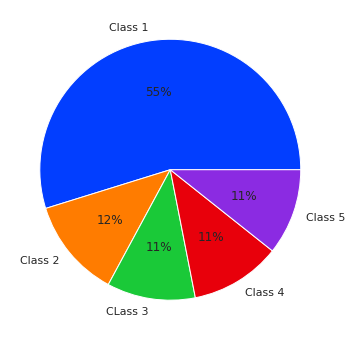

In [50]:
# 5 piecharts 
# declaring data
data = [200, 45, 40, 41, 39]
keys = ['Class 1', 'Class 2', 'CLass 3', 'Class 4', 'Class 5']

f, ax = plt.subplots(figsize=(7, 6))
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

In [91]:
def add_dict_symbol(reviews,symbols=set(r"""`~!@#$%^&*()_-+={[]}|\:;"'<,>.?/""")
):
    word_count = {}
    for review in reviews:
        for char in review :
            if char in symbols:
                if char in word_count:
                    word_count[char] += 1
                else :
                    word_count[char] = 1
    return word_count
    
sdf = df.groupby('category').text.apply(list).reset_index()
sdf['symbols_count'] = gdf.text.apply(add_dict_symbol)

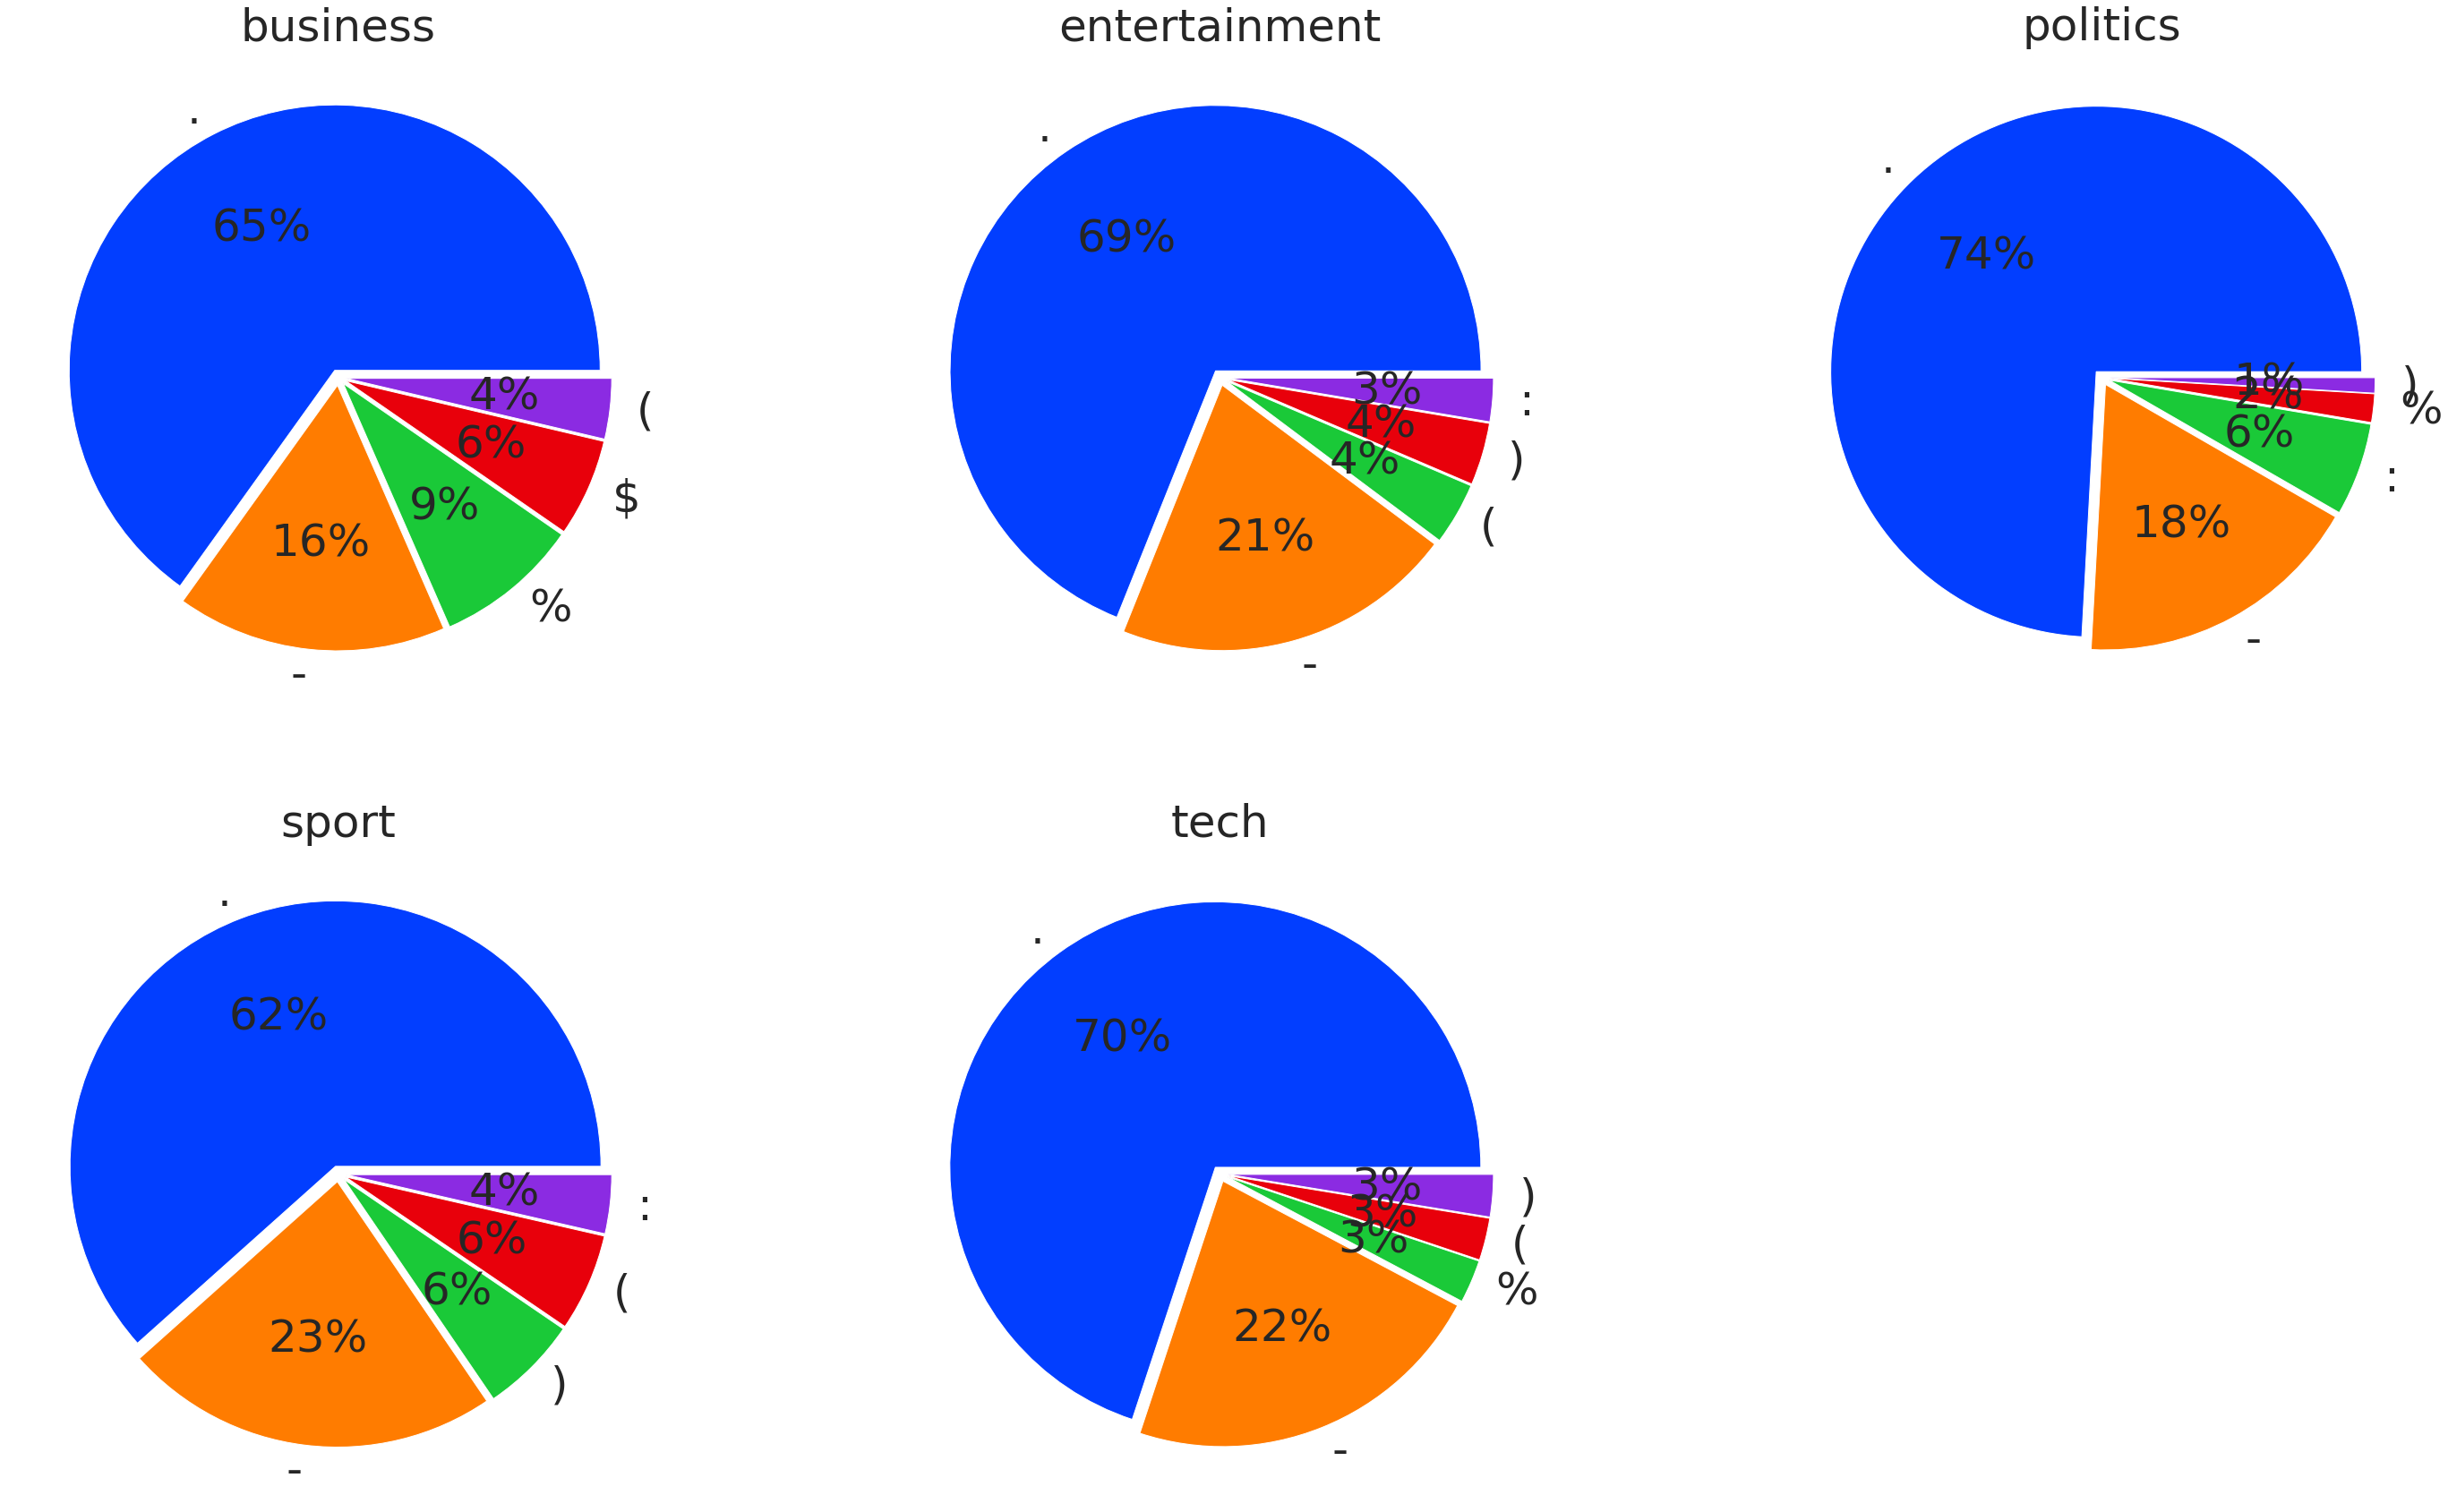

In [104]:
categories = sdf.category.values.tolist()

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

plt.rcParams["figure.figsize"] = (50,30)
i=0
for cat in categories :
    di = sdf[sdf['category']==cat].symbols_count[i]
    sorted_di = {k: v for k, v in sorted(di.items(), key=lambda item: item[1],reverse=True)}
    data = list(sorted_di.values())[:5]
    keys = list(sorted_di.keys())[:5]
    explode = [0.03 for i in range(5)]
    
    # plotting data on chart
    plt.subplot(2,3,i+1)
    plt.axis("off")
    plt.title(cat,fontsize=50)
    plt.pie(data, labels=keys, colors=palette_color, explode=explode, autopct='%.0f%%', textprops={'fontsize': 50})
    i += 1


REMARQUE :
le caractère '$' n'apparait que dans la catégorie business (peut etre gardé)
le '.' est toujours présent et toujours majoritaire (peut etre supprimé)
le '%' n'apparait pas dans sport et entertainement (peut etre gardé ?)

In [79]:
df_nb_reviews = df.groupby('category').count()
df_nb_reviews

text  cleaned_news
category                         
business        510           510
entertainment   386           386
politics        417           417
sport           511           511
tech            401           401

category  nb_news
0       business      510
1  entertainment      386
2       politics      417
3          sport      511
4           tech      401

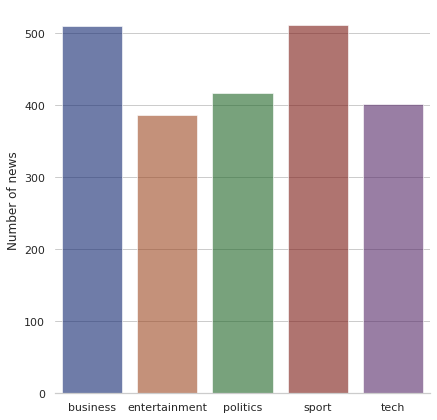

In [80]:
# barchart nombre de reviews par topic 
dict_nb_reviews = df.groupby('category').size().to_dict()
df_nb_reviews = pd.DataFrame.from_dict(dict_nb_reviews,orient='index',columns=['nb_news']).reset_index().rename(columns={'index':'category'})
sns.set_theme(style="whitegrid")
display(df_nb_reviews)
# Draw a nested barplot by species and sex
g = sns.catplot(
    kind="bar",
    data = df_nb_reviews,
    x='category', y='nb_news', palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Number of news")

Il n y a pas un gros déséquilibre entre les nombres de news par catégories, on pourra donc entrainer notre modèle directement dessus.

## 2. Clean lemmitization & stemming

In [77]:
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))

def clean_news(text):
    """
    Clean the input text 
    """
    cleaned_text = text.lower()
    cleaned_text = re.sub('[^a-zA-Z0-9$\s]', '', cleaned_text)
    cleaned_text = cleaned_text.split()
    cleaned_text = [word for word in cleaned_text if word not in stopwords and len(word) > 1]
    
    return " ".join(cleaned_text)

In [119]:
df['cleaned_news'] = df['text'].apply(lambda x: clean_news(x))

## 3 Bag of words

In [120]:
from sklearn.model_selection import train_test_split
X = df['cleaned_news'].values.tolist()
y = df['category'].values.tolist()

### 3.1 Construire les vecteurs BoW & Tfidf ( CountVectorizer & TfidfVectorizer )

In [22]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### CountVectorizer & TfidfVectorizer

In [23]:
cv = CountVectorizer(stop_words='english')
cv_X = cv.fit_transform(X)
print(cv_X.shape)

(2225, 32418)


In [24]:
tf = TfidfVectorizer(stop_words='english') #ici on peut ajouter min_df, max_df. voir la doc de TfidfVectorizer !!
tf_X = tf.fit_transform(X)
print(tf_X.shape)

(2225, 32418)


### 3.2 Split Train / Test

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train))

1780


In [26]:
cv_train = cv.transform(X_train)
cv_test = cv.transform(X_test)

In [27]:
from sklearn import preprocessing

In [28]:
le = preprocessing.LabelEncoder()

In [29]:
le.fit(df.category.unique())

LabelEncoder()

In [30]:
le.classes_

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

In [31]:
train_category = le.fit_transform(y_train)
test_category = le.fit_transform(y_test)

In [32]:
#classes labels
#le.inverse_transform([0, 1, 2, 3, 4])
d = zip([0, 1, 2, 3, 4], le.inverse_transform([0, 1, 2, 3, 4]))
class_labels_dict = {}
for k,v in d:
    class_labels_dict[k] = v
    
class_labels_dict

{0: 'business', 1: 'entertainment', 2: 'politics', 3: 'sport', 4: 'tech'}

### 3.3 Logistic Regression with Bag of words

In [33]:
from sklearn.linear_model import LogisticRegressionCV

bow_lr = LogisticRegressionCV(cv=5,n_jobs = 3).fit(cv_train, train_category)
print(bow_lr)

LogisticRegressionCV(cv=5, n_jobs=3)


In [34]:
bow_lr.scores_

{0: array([[0.75842697, 0.91292135, 0.96629213, 0.97191011, 0.97191011,
         0.97752809, 0.9747191 , 0.9747191 , 0.97191011, 0.96629213],
        [0.77808989, 0.93539326, 0.95505618, 0.95786517, 0.96348315,
         0.96348315, 0.96348315, 0.96348315, 0.96629213, 0.96629213],
        [0.78932584, 0.91853933, 0.96348315, 0.97191011, 0.9747191 ,
         0.97191011, 0.97191011, 0.97191011, 0.97191011, 0.97191011],
        [0.77808989, 0.93258427, 0.97191011, 0.97752809, 0.97752809,
         0.97752809, 0.97752809, 0.98033708, 0.98033708, 0.98033708],
        [0.77247191, 0.95505618, 0.97752809, 0.98033708, 0.98033708,
         0.98314607, 0.98314607, 0.98314607, 0.98595506, 0.98314607]]),
 1: array([[0.75842697, 0.91292135, 0.96629213, 0.97191011, 0.97191011,
         0.97752809, 0.9747191 , 0.9747191 , 0.97191011, 0.96629213],
        [0.77808989, 0.93539326, 0.95505618, 0.95786517, 0.96348315,
         0.96348315, 0.96348315, 0.96348315, 0.96629213, 0.96629213],
        [0.78932584

In [35]:
bow_test_predictions = bow_lr.predict(cv_test)

In [36]:
print(bow_test_predictions)
print(test_category)

[2 0 1 4 3 0 4 3 3 4 1 1 1 1 1 4 2 3 1 2 1 1 2 2 2 2 2 3 1 3 2 4 2 1 0 1 4
 0 4 3 0 3 1 0 1 1 0 3 1 3 2 3 1 1 1 0 2 0 1 0 1 4 0 0 2 3 3 1 0 0 4 0 4 4
 0 2 4 1 0 4 0 2 2 1 2 3 3 1 3 3 2 1 4 0 2 0 3 2 2 4 0 4 3 3 4 0 2 0 1 2 3
 2 2 3 4 3 3 0 1 2 2 3 2 1 1 3 4 2 3 1 4 2 0 0 3 4 1 0 2 2 3 0 3 1 1 3 1 1
 4 0 1 4 1 0 4 2 3 2 2 3 2 4 3 3 0 3 4 3 2 3 0 2 0 2 1 3 3 1 0 3 4 4 2 4 2
 4 4 4 1 2 4 4 3 0 2 4 2 4 0 3 2 4 4 3 3 0 1 3 0 3 2 1 0 2 3 0 0 1 3 2 3 2
 2 2 3 1 4 1 2 0 4 2 4 1 0 3 3 2 3 3 2 0 0 1 1 3 2 4 3 0 2 0 3 4 3 0 0 3 4
 4 1 4 1 2 1 2 2 3 0 2 4 4 4 1 1 3 3 0 3 4 1 4 3 3 3 2 1 1 3 1 0 3 3 2 0 3
 4 0 0 0 2 0 4 2 4 2 2 4 4 2 0 3 3 0 4 2 0 2 1 2 3 3 3 1 3 3 3 3 3 3 1 1 3
 0 0 0 3 4 4 3 4 4 4 2 3 1 3 0 2 4 4 2 3 3 0 1 1 0 2 2 0 0 4 2 3 3 2 3 4 3
 0 4 1 1 4 2 0 0 1 2 2 2 0 1 0 2 1 0 4 0 0 3 4 3 0 0 1 2 0 0 1 2 0 1 2 0 3
 0 4 4 2 4 1 4 2 0 1 0 0 0 3 1 3 3 1 3 0 4 4 0 4 4 4 1 0 4 1 4 1 0 0 0 0 0
 0]
[2 0 1 4 3 0 0 3 3 4 1 1 1 1 1 4 2 3 1 2 1 1 2 2 2 2 2 3 1 3 2 4 2 1 0 1 4
 0 4 3 0 3 1 0 1 1 0 

In [37]:
c = 0
for x,y in zip(test_category, bow_test_predictions):
    if x == y:
        c+=1
    
print('Accuracy:',c/len(test_category))
# Overfitting ????

Accuracy: 0.9573033707865168


In [39]:
# save model
import pickle

# save the model to disk
filename = 'bow_lr_model.sav'
pickle.dump(bow_lr, open(filename, 'wb'))

###  Logistic Regression with Tf-Idf

In [42]:
from sklearn.linear_model import LogisticRegressionCV

tf_train = tf.transform(X_train)
tf_test = tf.transform(X_test)


In [43]:

lr = LogisticRegressionCV(cv = 5)
tfidf_lr = lr.fit(tf_train, train_category)
print(tfidf_lr)

LogisticRegressionCV(cv=5)


In [44]:
tfidf_test_predictions = tfidf_lr.predict(tf_test)

In [45]:
print(tf_test.shape)

(445, 32418)


In [46]:
print(tfidf_test_predictions)
print(test_category)

[2 0 1 4 3 0 4 3 3 4 1 1 1 1 1 4 2 3 1 0 1 1 0 2 2 2 2 3 1 3 2 4 2 1 0 1 4
 0 4 3 0 3 1 0 1 1 0 3 1 3 2 3 1 1 1 0 2 0 1 0 1 4 0 0 2 3 3 1 0 0 4 0 4 4
 4 2 4 1 0 4 0 2 2 1 2 3 3 1 3 3 2 1 4 0 2 0 3 2 2 4 0 4 3 3 4 0 2 0 1 2 3
 2 2 3 4 3 3 0 2 2 2 3 2 1 1 3 4 2 3 1 4 2 0 0 3 4 1 0 2 2 3 0 3 1 1 3 1 1
 4 0 1 4 1 0 4 2 3 2 2 3 2 4 3 3 0 3 4 3 2 3 0 2 0 2 1 3 3 1 0 3 4 4 2 1 2
 4 4 4 1 2 4 4 3 0 2 4 2 4 0 3 2 4 4 3 3 0 1 3 0 3 2 1 0 2 3 0 0 1 3 2 3 2
 2 2 3 1 4 1 2 0 4 2 4 1 0 3 3 2 3 3 2 0 0 1 1 3 2 4 3 0 2 0 3 4 3 0 0 3 4
 4 1 4 1 2 1 2 2 3 0 2 4 4 1 1 1 3 3 0 3 4 1 4 3 3 3 2 1 1 3 1 0 3 3 2 0 3
 4 0 0 0 2 0 4 2 4 2 2 4 4 2 0 3 3 0 4 0 0 2 1 2 3 3 3 1 3 3 3 3 3 3 1 1 3
 0 0 0 3 4 4 3 4 4 4 2 3 1 3 0 2 4 4 1 3 3 0 1 1 0 2 2 0 0 4 2 3 3 2 3 4 3
 0 4 0 4 4 2 0 0 1 2 2 2 0 1 0 2 1 0 4 0 0 3 4 3 0 0 1 2 0 2 1 2 0 1 2 0 3
 4 4 4 2 4 1 4 2 0 1 0 0 0 3 1 3 3 1 3 0 4 4 0 4 4 4 1 0 4 1 4 1 0 0 0 0 0
 0]
[2 0 1 4 3 0 0 3 3 4 1 1 1 1 1 4 2 3 1 2 1 1 2 2 2 2 2 3 1 3 2 4 2 1 0 1 4
 0 4 3 0 3 1 0 1 1 0 

In [47]:
c = 0
for x,y in zip(test_category, tfidf_test_predictions):
    if x == y:
        c+=1
    
print('Accuracy:',c/len(test_category))

Accuracy: 0.9752808988764045


In [49]:
# save model
import pickle

# save the model to disk
filename = 'tfidf_lr_model.sav'
pickle.dump(tfidf_lr, open(filename, 'wb'))

In [48]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(tf_test, test_category)
print(result)

0.2202247191011236


### 3.3 Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf = RandomForestClassifier(max_depth=10, random_state=0)
bow_rf = rf.fit(cv_train, train_category)


In [60]:
bow_rf_test_predictions = bow_rf.predict(cv_test)

In [61]:
print(bow_rf_test_predictions)
print(test_category)

[2 0 1 4 3 0 0 3 3 4 1 1 1 1 1 4 2 3 1 0 1 3 0 2 2 2 0 3 1 3 2 4 2 1 0 1 4
 0 4 3 0 3 1 0 1 0 0 3 1 3 0 3 1 1 1 0 2 0 1 0 1 0 0 0 2 3 3 3 0 0 3 0 4 4
 0 2 4 1 0 4 0 2 2 1 2 3 3 1 3 3 2 1 4 0 2 0 3 2 2 4 0 4 3 3 4 0 2 0 1 2 3
 2 2 0 4 3 3 0 3 2 2 3 2 1 1 3 4 2 3 3 4 2 0 0 3 4 1 0 2 0 3 0 3 1 1 3 1 1
 4 0 1 4 1 0 4 0 3 2 2 3 4 4 3 3 0 3 4 3 2 3 0 2 0 2 0 3 3 1 0 3 4 4 2 0 2
 4 4 4 1 2 4 4 3 0 2 4 2 4 0 3 2 4 4 3 3 0 1 3 0 2 2 1 0 2 3 0 0 1 3 2 3 2
 2 2 3 1 4 1 2 0 4 2 4 1 0 3 3 3 3 3 2 0 0 1 1 3 2 4 3 0 2 0 3 4 3 0 0 3 4
 4 1 4 1 2 1 2 2 3 0 2 4 4 0 1 1 3 3 0 3 4 1 3 3 3 3 2 1 1 3 1 0 3 3 2 0 3
 4 0 0 0 2 0 4 2 3 2 2 4 4 2 0 3 3 0 4 0 0 2 1 2 3 3 3 1 3 3 3 3 3 3 1 1 3
 0 0 0 3 4 4 3 4 4 4 2 3 1 3 0 2 4 4 0 3 3 0 1 1 0 2 2 0 0 4 2 3 3 2 3 4 3
 0 4 0 4 4 2 0 0 1 2 2 2 0 1 0 2 1 0 4 0 0 3 4 3 0 0 3 2 0 0 1 2 0 1 2 0 3
 0 4 4 2 4 1 4 0 0 0 0 0 0 3 1 3 3 0 3 0 4 3 0 4 4 4 1 0 4 1 4 1 0 0 0 0 0
 0]
[2 0 1 4 3 0 0 3 3 4 1 1 1 1 1 4 2 3 1 2 1 1 2 2 2 2 2 3 1 3 2 4 2 1 0 1 4
 0 4 3 0 3 1 0 1 1 0 

In [62]:
c = 0
for x,y in zip(test_category, bow_rf_test_predictions):
    if x == y:
        c+=1
    
print('Accuracy:',c/len(test_category))
# Not Adapted ???

Accuracy: 0.9303370786516854


In [105]:
# save model
import pickle

# save the model to disk
filename = 'bow_rf_model.sav'
pickle.dump(bow_rf, open(filename, 'wb'))

### SVM with bag of words

In [64]:
from sklearn.svm import SVC

In [65]:
sv = SVC(kernel='linear', C=1E10)
bow_sv = sv.fit(cv_train, train_category)

In [66]:
bow_sv_test_predictions = bow_sv.predict(cv_test)

In [67]:
print(bow_sv_test_predictions)
print(test_category)

[2 0 1 4 3 0 0 3 3 4 1 1 1 1 1 4 2 3 1 2 1 1 2 2 2 2 2 3 1 3 2 4 2 1 0 1 4
 0 4 3 0 3 1 0 1 1 0 3 1 3 2 3 1 1 1 0 2 0 1 0 1 4 0 0 2 3 3 1 0 0 4 0 4 4
 0 2 4 1 0 4 0 2 2 1 2 3 3 1 4 3 2 1 4 0 2 0 3 2 2 4 0 4 3 3 4 0 2 0 1 2 3
 2 2 0 4 3 3 0 1 2 2 3 2 1 1 3 4 2 3 1 4 2 0 0 3 4 1 0 2 2 3 0 3 1 1 3 1 1
 4 0 1 4 1 0 4 2 3 2 2 3 2 4 3 3 0 3 4 3 2 3 0 2 0 2 1 3 3 1 0 3 4 4 2 4 2
 4 4 4 1 2 4 4 3 0 2 4 2 4 0 3 2 4 4 3 3 0 1 3 0 3 2 1 0 2 3 0 0 1 3 2 3 2
 2 2 3 1 4 1 2 0 4 2 4 1 0 3 3 2 3 3 2 0 0 1 1 3 2 4 3 0 2 0 3 4 3 0 0 3 4
 4 1 4 1 2 1 2 2 3 0 2 4 4 1 1 1 3 3 0 3 4 1 4 3 3 3 2 1 1 3 1 0 3 3 2 0 3
 4 0 0 0 2 0 4 2 4 2 2 4 4 2 0 3 3 0 4 1 0 2 1 2 3 3 3 1 3 3 3 3 3 3 1 1 3
 0 0 0 3 4 4 3 4 4 4 2 3 1 3 0 2 4 4 2 3 3 0 1 1 0 2 2 0 0 4 2 3 3 2 3 4 3
 0 4 1 1 4 2 0 0 1 2 2 2 0 1 0 2 1 0 4 0 0 3 4 3 0 0 1 2 0 0 1 2 0 1 2 0 3
 0 4 4 2 4 1 4 2 0 1 0 0 0 3 1 3 3 1 3 0 4 4 0 4 4 4 1 0 4 1 4 1 0 0 0 0 0
 0]
[2 0 1 4 3 0 0 3 3 4 1 1 1 1 1 4 2 3 1 2 1 1 2 2 2 2 2 3 1 3 2 4 2 1 0 1 4
 0 4 3 0 3 1 0 1 1 0 

In [196]:
# save model
import pickle

# save the model to disk
filename = 'bow_vectorizer_svm.sav'
pickle.dump(bow_sv, open(filename, 'wb'))

In [68]:
c = 0
for x,y in zip(test_category, bow_sv_test_predictions):
    if x == y:
        c+=1
    
print('Accuracy:',c/len(test_category))

Accuracy: 0.9662921348314607


In [142]:
# save model
import pickle

# save the model to disk
filename = 'bow_sv_model.sav'
pickle.dump(bow_sv, open(filename, 'wb'))

### Svm with tf-idf

In [121]:
tf = TfidfVectorizer(stop_words='english') #ici on peut ajouter min_df, max_df. voir la doc de TfidfVectorizer !!
tf_X = tf.fit_transform(X)
print(tf_X.shape)

(2225, 32393)


In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train))

1780


In [123]:
tf_train = tf.transform(X_train)
tf_test = tf.transform(X_test)

In [195]:
# save model
import pickle

# save the model to disk
filename = 'tfidf_vectorizer_svm.sav'
pickle.dump(tf, open(filename, 'wb'))

In [124]:
train_category = le.fit_transform(y_train)
test_category = le.fit_transform(y_test)

In [84]:
sv = SVC()
tfidf_sv = sv.fit(tf_train, train_category)

In [85]:
len(test_category)

445

In [86]:
tfidf_sv.score(tf_test,test_category)

0.9662921348314607

In [107]:
# save model
import pickle

# save the model to disk
filename = 'tfidf_sv_model.sav'
pickle.dump(tfidf_sv, open(filename, 'wb'))

In [291]:
import pickle
# import clean_news()

# classification function ['business', 'entertainment', 'politics', 'sport', 'tech']
def classify_text(text, tfidf = tf,class_labels_dict=class_labels_dict, model_filename='lr_model.sav'):
    text_cleaned = clean_news(text)
    # trouver une manière pour splitter les mots
    vector_tfidf = tf.transform([text_cleaned])
    model = pickle.load(open(filename, 'rb'))
    result = model.predict(vector_tfidf)
    return class_labels_dict[result[0]]

In [192]:
print(class_labels_dict)

{0: 'business', 1: 'entertainment', 2: 'politics', 3: 'sport', 4: 'tech'}


In [346]:
text = ""
classify_text(text)

'business'

In [349]:
from wordcloud import WordCloud

In [350]:
def add_dict_word(reviews):
    word_count = {}
    for review in reviews:
        for word in review.split(' ') :
            if word in word_count:
                word_count[word] += 1
            else :
                word_count[word] = 1
                
    return word_count

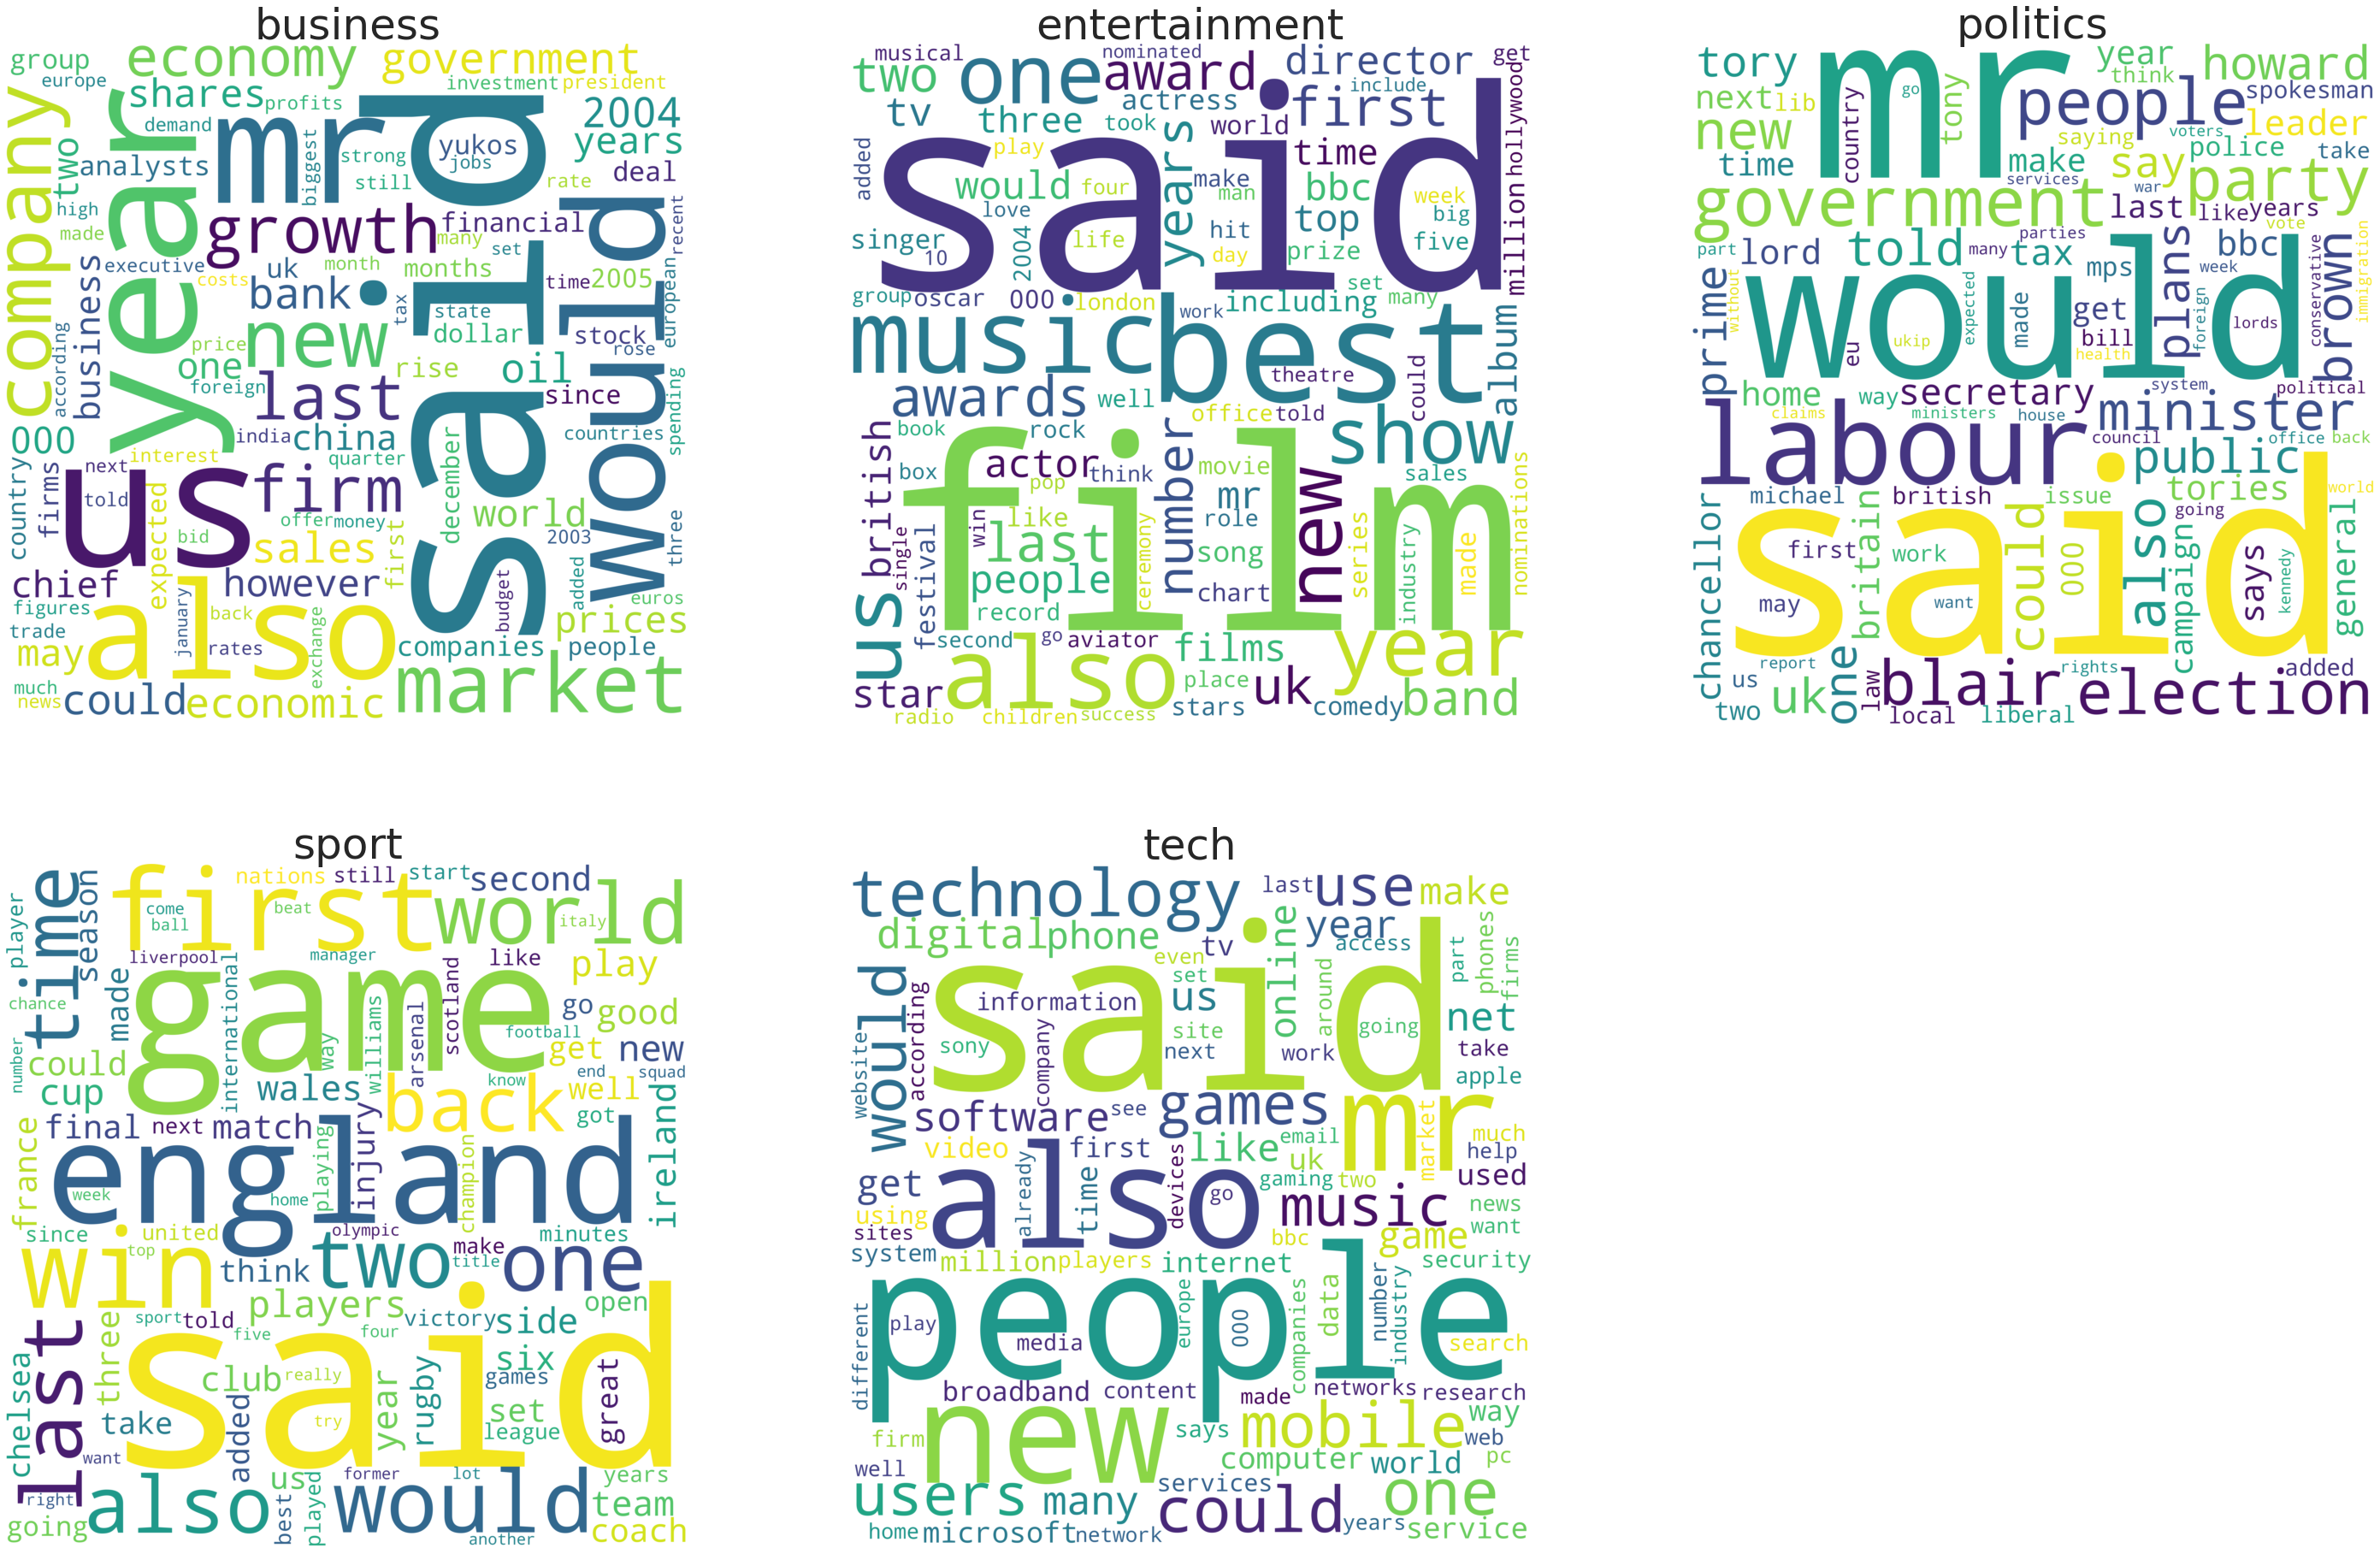

In [351]:
gdf = df.groupby('category').cleaned_news.apply(list).reset_index()
gdf['word_count'] = gdf.cleaned_news.apply(add_dict_word)
gdf
# new word to vec
categories = gdf.category.values.tolist()
#fig, ax = plt.subplots(nrows=1, ncols=len(categories))
# list(gdf[gdf['category']=='entertainment'].word_count.to_dict().keys())[0]
plt.rcParams["figure.figsize"] = (50,50)
i=0
for cat in categories :
    data = gdf[gdf['category']==cat].word_count.to_dict()[i]
    wc = WordCloud(background_color ='white', width=5000, height = 5000, max_words = 100, relative_scaling = 0.5,normalize_plurals = False).generate_from_frequencies(data)
    plt.subplot(3,3,i+1)
    plt.axis("off")
    plt.imshow(wc, interpolation="bilinear")
    plt.title(cat,fontsize=50)
    i += 1
plt.show()

## 4. Word2Vec

In [88]:
from nltk import sent_tokenize

In [89]:
import gensim

In [90]:
from sklearn.model_selection import train_test_split


In [91]:
from gensim.utils import simple_preprocess

In [92]:
corpus = [sent_tokenize(review) for review in df.cleaned_news.values.tolist()]

In [93]:
words = []
labels = []
for rev,label in zip(df.cleaned_news.values.tolist(), df.category.values.tolist()):
    sent_rev = sent_tokenize(rev)
    for word in sent_rev:
        words.append(simple_preprocess(word))
        labels.append(label)


In [94]:
model_w2v = gensim.models.Word2Vec(words, window = 5, min_count = 1)

In [95]:
def review_embeddings(review,model_w2v, method:str = 'avg'):
    """ 
    Return the Text vector using the average or sum of word embeddings given by Word2Vec
    """
    if method == 'avg':
        return np.mean([model_w2v.wv[word] for word in review if word in model_w2v.wv.index_to_key], axis = 0)
    return np.sum([model_w2v.wv[word] for word in review if word in model_w2v.wv.index_to_key], axis = 0)

In [96]:
X_reviews = [review_embeddings(review,model_w2v) for review in words]
X_reviews = np.array(X_reviews)
label_dict  ={'business':0, 'entertainment':1,'politics':2,'sport':3,'tech':4}
y_reviews = [label_dict[label] for label in labels]
X_train, X_test, y_train, y_test = train_test_split(X_reviews, y_reviews, test_size =0.2)

In [97]:
from sklearn.linear_model import LogisticRegression
lr_w2v = LogisticRegression()

In [98]:
X_train_corr = []
y_train_corr = []
for i,y in zip(X_train,y_train):
    try:
        if i.shape[0] == 100:
            X_train_corr.append(i)
            y_train_corr.append(y)
    except:
        print(i)

In [99]:
X_test_corr = []
y_test_corr = []
for i,y in zip(X_test,y_test):
    try:
        if i.shape[0] == 100:
            X_test_corr.append(i)
            y_test_corr.append(y)
    except:
        print(i)

In [100]:
X_train_corr = np.array(X_train_corr)
X_test_corr = np.array(X_test_corr)

In [101]:
lr_w2v.fit(X_train_corr, y_train_corr)

/home_local/admin/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [102]:
from sklearn.metrics import accuracy_score

In [103]:
accuracy_score(y_test_corr,lr_w2v.predict(X_test_corr))

0.9191011235955057

In [104]:
model_w2v.wv.most_similar('business')

[('buy', 0.9954310655593872),
 ('operating', 0.9928811192512512),
 ('reduce', 0.992861270904541),
 ('offer', 0.9926395416259766),
 ('credit', 0.9919050931930542),
 ('regulator', 0.9917522072792053),
 ('carrier', 0.9914599061012268),
 ('offshore', 0.991354763507843),
 ('seeking', 0.9912638664245605),
 ('energy', 0.9910051226615906)]

In [108]:
# save model
import pickle

# save the model to disk
filename = 'w2v_lr_model.sav'
pickle.dump(lr_w2v, open(filename, 'wb'))

### 4.2 Word2Vec Google model

In [52]:
import gensim.downloader 
model = gensim.downloader.load("word2vec-google-news-300")

In [56]:
model

In [58]:
def review_embeddings_2(review,model_w2v, method:str = 'avg'):
    """ 
    Return the Text vector using the average or sum of word embeddings given by Word2Vec
    """
    if method == 'avg':
        return np.mean([model_w2v[word] for word in review if word in model_w2v], axis = 0)
    return np.sum([model_w2v.wv[word] for word in review if word in model_w2v], axis = 0)

In [59]:
X_reviews = [review_embeddings_2(review,model) for review in words]
X_reviews = np.array(X_reviews)
label_dict  ={'business':0, 'entertainment':1,'politics':2,'sport':3,'tech':4}
y_reviews = [label_dict[label] for label in labels]
X_train, X_test, y_train, y_test = train_test_split(X_reviews, y_reviews, test_size =0.2)

In [60]:
lr_w2v_2 = LogisticRegression()

In [63]:
lr_w2v_2.fit(X_train, y_train)

LogisticRegression()

In [64]:
accuracy_score(y_test,lr_w2v_2.predict(X_test))

0.950561797752809

## 5. LDA

In [202]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [204]:
cv_lda = CountVectorizer(stop_words='english', max_features=100000)

In [205]:
bow_matrix = cv_lda.fit_transform(df.cleaned_news.values.tolist())
K = 5

In [223]:
tf_lda = TfidfVectorizer(stop_words='english', max_df=0.8, min_df = 0.05) # a modifier les autres tfidf

category                                               text  \
0              tech  tv future in the hands of viewers with home th...   
1          business  worldcom boss  left books alone  former worldc...   
2             sport  tigers wary of farrell  gamble  leicester say ...   
3             sport  yeading face newcastle in fa cup premiership s...   
4     entertainment  ocean s twelve raids box office ocean s twelve...   
...             ...                                                ...   
2220       business  cars pull down us retail figures us retail sal...   
2221       politics  kilroy unveils immigration policy ex-chatshow ...   
2222  entertainment  rem announce new glasgow concert us band rem h...   
2223       politics  how political squabbles snowball it s become c...   
2224          sport  souness delight at euro progress boss graeme s...   

                                           cleaned_news  
0     tv future hands viewers home theatre systems p...  
1     worldcom boss left books alone former worldcom...  
2     tigers wary farrell gamble leicester say rushe...  
3     yeading face newcastle fa cup premiership side...  
4     ocean twelve raids box office ocean twelve cri...  
...                                                 ...  
2220  cars pull us retail figures us retail sales fe...  
2221  kilroy unveils immigration policy exchatshow h...  
2222  rem announce new glasgow concert us band rem a...  
2223  political squabbles snowball become commonplac...  
2224  souness delight euro progress boss graeme soun...  

[2225 rows x 3 columns]

In [219]:
tf_matrix = tf_lda.fit_transform(df.cleaned_news.values.tolist())

<2225x491 sparse matrix of type '<class 'numpy.float64'>'
	with 100784 stored elements in Compressed Sparse Row format>

In [211]:
lda = LatentDirichletAllocation(n_components= K )

In [212]:
lda_matrix = lda.fit_transform(tf_matrix)

In [213]:
document_topic = lda_matrix.argmax(axis = 1).tolist()

In [224]:
# save model
import pickle

# save the model to disk
filename = 'tfidf_lda.sav'
pickle.dump(tf_lda, open(filename, 'wb'))

In [214]:
from collections import Counter
Counter(document_topic)

Counter({1: 877, 4: 67, 0: 532, 3: 312, 2: 437})

In [215]:
topic_words = {}
n_top_words = 20 
vocab  = tf_lda.get_feature_names()
for topic, comp in enumerate(lda.components_):
    # for the n-dimensional array "arr":
    # argsort() returns a ranked n-dimensional array of arr, call it "ranked_array"
    # which contains the indices that would sort arr in a descending fashion
    # for the ith element in ranked_array, ranked_array[i] represents the index of the
    # element in arr that should be at the ith index in ranked_array
    # ex. arr = [3,7,1,0,3,6]
    # np.argsort(arr) -> [3, 2, 0, 4, 5, 1]
    # word_idx contains the indices in "topic" of the top num_top_words most relevant
    # to a given topic ... it is sorted ascending to begin with and then reversed (desc. now)    
    word_idx = np.argsort(comp)[::-1][:n_top_words]

    # store the words most relevant to the topic
    topic_words[topic] = [vocab[i] for i in word_idx]

/home_local/admin/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [216]:
for topic, words in topic_words.items():
    print('Topic: %d' % topic)
    print('  %s' % ', '.join(words))

Topic: 0
  game, england, win, cup, play, players, match, world, injury, games, team, club, season, coach, ireland, time, final, good, open, second
Topic: 1
  people, year, market, new, mr, firm, sales, technology, company, growth, 2004, mobile, users, uk, software, economy, 000, music, net, million
Topic: 2
  mr, labour, government, blair, party, election, wales, brown, minister, people, howard, secretary, prime, public, plans, told, chancellor, tory, tax, tories
Topic: 3
  film, best, awards, award, star, music, films, tv, year, director, number, including, new, series, uk, british, london, years, office, life
Topic: 4
  court, mr, company, bid, offer, case, firm, deal, bank, club, financial, legal, group, sale, chief, executive, pay, board, agreed, accused


topic 0 -> sport

topic 1 -> politics

topic 2 -> tech

topic 3 -> business

topic 4 -> entertainment

In [134]:
test_category

array([2, 0, 1, 4, 3, 0, 0, 3, 3, 4, 1, 1, 1, 1, 1, 4, 2, 3, 1, 2, 1, 1,
       2, 2, 2, 2, 2, 3, 1, 3, 2, 4, 2, 1, 0, 1, 4, 0, 4, 3, 0, 3, 1, 0,
       1, 1, 0, 3, 1, 3, 0, 3, 1, 1, 1, 0, 2, 0, 1, 0, 1, 4, 0, 0, 2, 3,
       3, 1, 0, 0, 4, 0, 4, 4, 4, 2, 4, 1, 0, 4, 0, 2, 2, 1, 2, 3, 3, 1,
       4, 3, 2, 1, 4, 0, 2, 0, 3, 2, 2, 4, 0, 4, 3, 3, 4, 0, 2, 0, 1, 2,
       3, 2, 2, 0, 4, 3, 3, 0, 2, 2, 2, 3, 2, 1, 1, 3, 4, 2, 3, 1, 4, 2,
       0, 0, 3, 4, 1, 0, 2, 0, 3, 0, 3, 1, 1, 3, 1, 1, 4, 0, 1, 4, 1, 0,
       4, 0, 3, 2, 2, 3, 2, 4, 3, 3, 0, 3, 4, 3, 2, 3, 0, 0, 0, 2, 1, 3,
       3, 1, 0, 3, 4, 4, 2, 1, 2, 4, 4, 4, 1, 2, 4, 4, 3, 0, 2, 4, 2, 4,
       0, 3, 2, 4, 4, 3, 3, 0, 1, 3, 0, 3, 2, 1, 0, 2, 3, 0, 0, 1, 3, 2,
       3, 2, 2, 2, 3, 1, 4, 1, 2, 0, 4, 2, 4, 1, 0, 3, 3, 2, 3, 3, 2, 0,
       0, 1, 1, 3, 2, 4, 3, 0, 2, 0, 3, 4, 3, 0, 0, 3, 4, 4, 1, 4, 1, 2,
       1, 2, 2, 3, 0, 2, 4, 4, 1, 1, 1, 3, 3, 0, 3, 4, 1, 4, 3, 3, 3, 2,
       1, 1, 3, 1, 0, 3, 3, 2, 0, 3, 4, 0, 0, 0, 2,

In [217]:
# save model
import pickle

# save the model to disk
filename = 'lda_model.sav'
pickle.dump(lda, open(filename, 'wb'))

In [144]:
from transformers import BertTokenizer

In [145]:
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [146]:
from transformers import BertForSequenceClassification

In [156]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased',
                                                      num_labels = 5,  problem_type="multi_label_classification",labels=['test1','test2','test3','test4','test5'])

TypeError: __init__() got an unexpected keyword argument 'labels'

In [187]:
text = 'economy'
inputs = bert_tokenizer(text, return_tensors="pt")

In [188]:
import torch

In [189]:
with torch.no_grad():

    logits = model(**inputs).logits

In [190]:
print(model.config.id2label)

{0: 'LABEL_0', 1: 'LABEL_1', 2: 'LABEL_2', 3: 'LABEL_3', 4: 'LABEL_4'}


In [191]:
predicted_class_id = logits.argmax().item()

model.config.id2label[predicted_class_id]

'LABEL_3'

Label_0 ->

Label_1 ->

Label_2 ->

Label_3 -> Sport

Label_4 ->